In [5]:
import mysql.connector

In [6]:
whodb = mysql.connector.connect(host='127.0.0.1', user='root', password='M@tth3wD1999')
print(whodb)

if (whodb):
    print('Success')
else:
    print('Fail')

Success


In [16]:
mycursor = whodb.cursor()
mycursor.execute("Create database WHODatabase2")

In [17]:
mycursor.execute('Show databases')

for db in mycursor:
    print(db)

('datavaultdb',)
('information_schema',)
('mysql',)
('performance_schema',)
('sakila',)
('sys',)
('user2db',)
('user3db',)
('usersdb',)
('whodatabase',)
('whodatabase2',)
('world',)


In [18]:
whodb = mysql.connector.connect(host='127.0.0.1', user='root', password='M@tth3wD1999', database='whodatabase2')

mycursor =whodb.cursor()
mycursor.execute("Create table whocovidcasesworldwide(OBJECTID int(200), ISO_CODE varchar(3), COUNTRY_NAME varchar(200), Data_epicrv varchar(200), NewCase int(200), TotalCase int(200), NewDeath int(200), TotalDeath int(200))")

In [33]:
import pandas as pd

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
import seaborn as sns
import os

In [45]:
covid = pd.read_sql_query('SHOW TABLES FROM whodatabase2', whodb)
whodb

In [46]:
covid

,Tables_in_whodatabase2
0,whocovidcasesworldwide


In [47]:
tbl = covid['Tables_in_whodatabase2']

In [51]:
for tbl_name in tbl:
    rslt = pd.read_sql_query('DESCRIBE {}'.format(tbl_name), whodb)
    print(tbl_name)
    print(rslt)

whocovidcasesworldwide
          Field             Type Null Key Default Extra
0      OBJECTID           b'int'  YES        None      
1      ISO_CODE    b'varchar(3)'  YES        None      
2  COUNTRY_NAME  b'varchar(200)'  YES        None      
3   Data_epicrv  b'varchar(200)'  YES        None      
4       NewCase           b'int'  YES        None      
5     TotalCase           b'int'  YES        None      
6      NewDeath           b'int'  YES        None      
7    TotalDeath           b'int'  YES        None      


In [107]:
covid_rate = 'SELECT COUNTRY_NAME as Countries, COUNT(whocovidcasesworldwide.NewCase) as New_Cases\
              FROM whocovidcasesworldwide\
              GROUP BY COUNTRY_NAME\
              ORDER BY COUNTRY_NAME asc'

In [108]:
df = pd.read_sql_query(covid_rate, whodb)


In [109]:
df

,Countries,New_Cases
0,Afghanistan,60
1,Albania,46
2,Algeria,59
3,Andorra,53
4,Angola,34
...,...,...
208,Venezuela (Bolivarian Republic of),41
209,Viet Nam,91
210,Yemen,14
211,Zambia,37


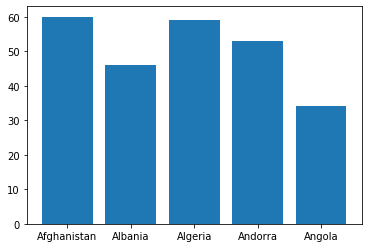

In [111]:
figure = plt.figure()
axes = figure.add_subplot(1, 1, 1)
axes.bar(df['Countries'].head(),df['New_Cases'].head())
plt.show()

In [113]:
import chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
chart_studio.tools.set_credentials_file(username='matth3w_D',api_key='hcLqTdvME7jzgmc6950A')

In [112]:
dbData = go.Scatter(x=df['Countries'], y=df['New_Cases'])
layout = go.Layout(title='COVID - 19 Data', xaxis=dict(title='COUNTRIES'), yaxis=dict(title='NewCases'))
fig = go.Figure(data=[dbData], layout=layout)
py.iplot(fig, sharing='public')

In [103]:
covid_death_rate = 'SELECT TotalCase as TotalCase, COUNT(whocovidcasesworldwide.COUNTRY_NAME) as Countries\
                    FROM whocovidcasesworldwide\
                    GROUP BY TotalCase'

In [104]:
df = pd.read_sql_query(covid_death_rate, whodb)

In [105]:
df

,TotalCase,Countries
0,1,885
1,4,191
2,7,183
3,10,129
4,16,153
...,...,...
2602,896,1
2603,1214,1
2604,1349,1
2605,1565,1
